In [1]:
# %pip install matplotlib
# %pip install palmerpenguins
# %pip install pydotplus
# %pip install numpy
# %pip install ipython
# %pip install sklearn
# %pip install seaborn

In [25]:
from palmerpenguins import load_penguins

import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

RANDOM_STATE = 42

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [4]:
penguins = penguins.dropna()

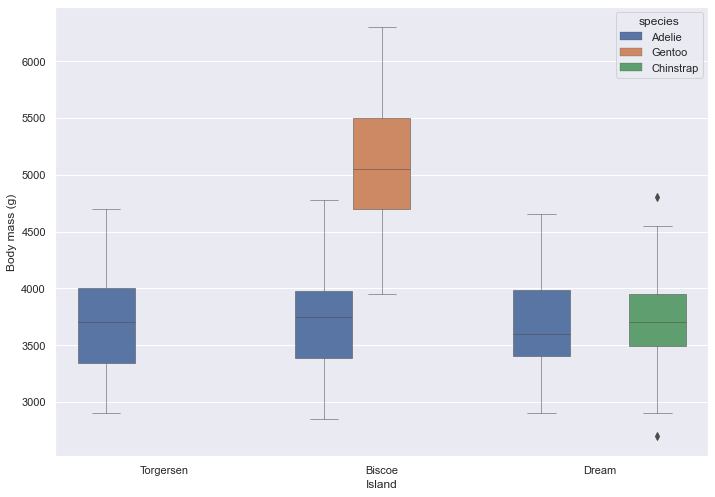

In [5]:
g = sns.boxplot(x = 'island',
                y ='body_mass_g',
                hue = 'species',
                data = penguins,
                linewidth=0.5)

g.set_xlabel('Island');
g.set_ylabel('Body mass (g)');

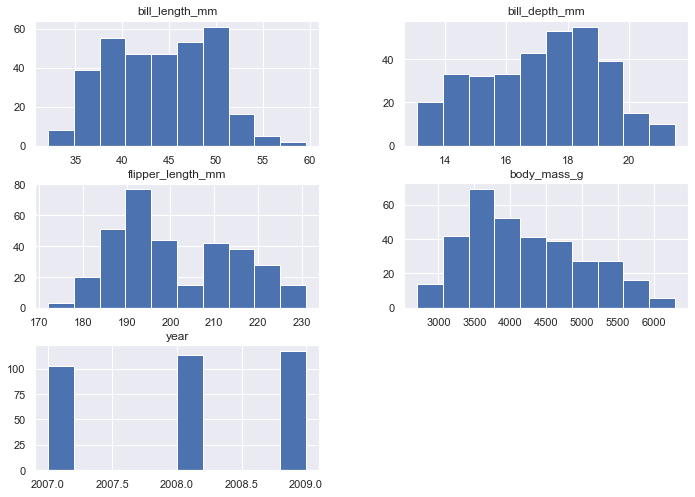

In [6]:
penguins.hist();

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [8]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [9]:
numeric_features = ['bill_length_mm', 'body_mass_g', 'bill_depth_mm', 'flipper_length_mm']
one_hot_features = ['island']
binary_feature = 'sex' 
target = 'species'

In [10]:
penguins['is_female'] = np.where(penguins['sex'] == 'female', 1, 0)

In [11]:
ohe = OneHotEncoder(sparse=False)

transformed = ohe.fit_transform(penguins[one_hot_features].to_numpy().reshape(-1,1))

ohe_df = pd.DataFrame(transformed, 
                      columns=ohe.get_feature_names(),
                      index=penguins.index)

ohe_df.shape

(333, 3)

In [12]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,is_female
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007,1
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007,0
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007,1
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007,0


In [13]:
ohe_df.head(10)

,x0_Biscoe,x0_Dream,x0_Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
12,0.0,0.0,1.0
13,0.0,0.0,1.0
14,0.0,0.0,1.0


In [14]:
data = pd.concat([penguins, ohe_df], axis=1).drop(['island', 'sex', 'year' ], axis=1)
data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,is_female,x0_Biscoe,x0_Dream,x0_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,1,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,1,0.0,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,1,0.0,0.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,0,0.0,1.0,0.0
340,Chinstrap,43.5,18.1,202.0,3400.0,1,0.0,1.0,0.0
341,Chinstrap,49.6,18.2,193.0,3775.0,0,0.0,1.0,0.0
342,Chinstrap,50.8,19.0,210.0,4100.0,0,0.0,1.0,0.0


In [27]:
X = data.iloc[:, 1:]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=RANDOM_STATE)

In [29]:
tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = tree_clf.predict(X_test)

In [31]:
labels=['Adelie','Chinstrap','Gentoo']

cm_array = confusion_matrix(y_test, y_pred, labels=labels)

print(cm_array)

[[48  0  0]
 [ 1 22  0]
 [ 0  0 29]]


In [32]:
print(tree_clf.score(X_test,y_test))


0.99


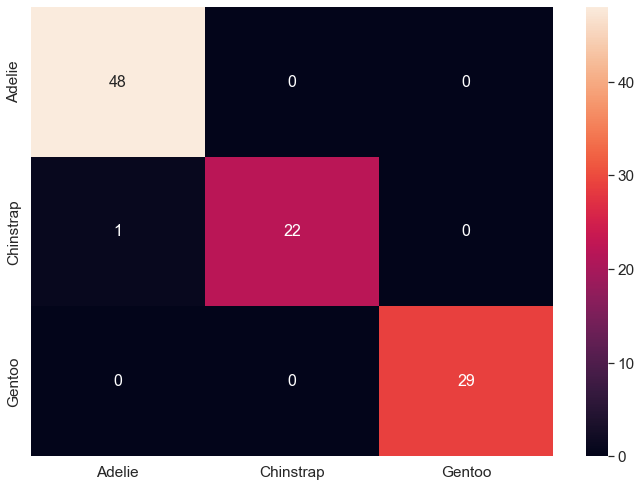

In [33]:
# df_cm = pd.DataFrame(cm_array, range(3), range(3))

df_cm = pd.DataFrame(cm_array, index=labels, columns=labels)

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}); # font size

# plt.show()

In [34]:
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz


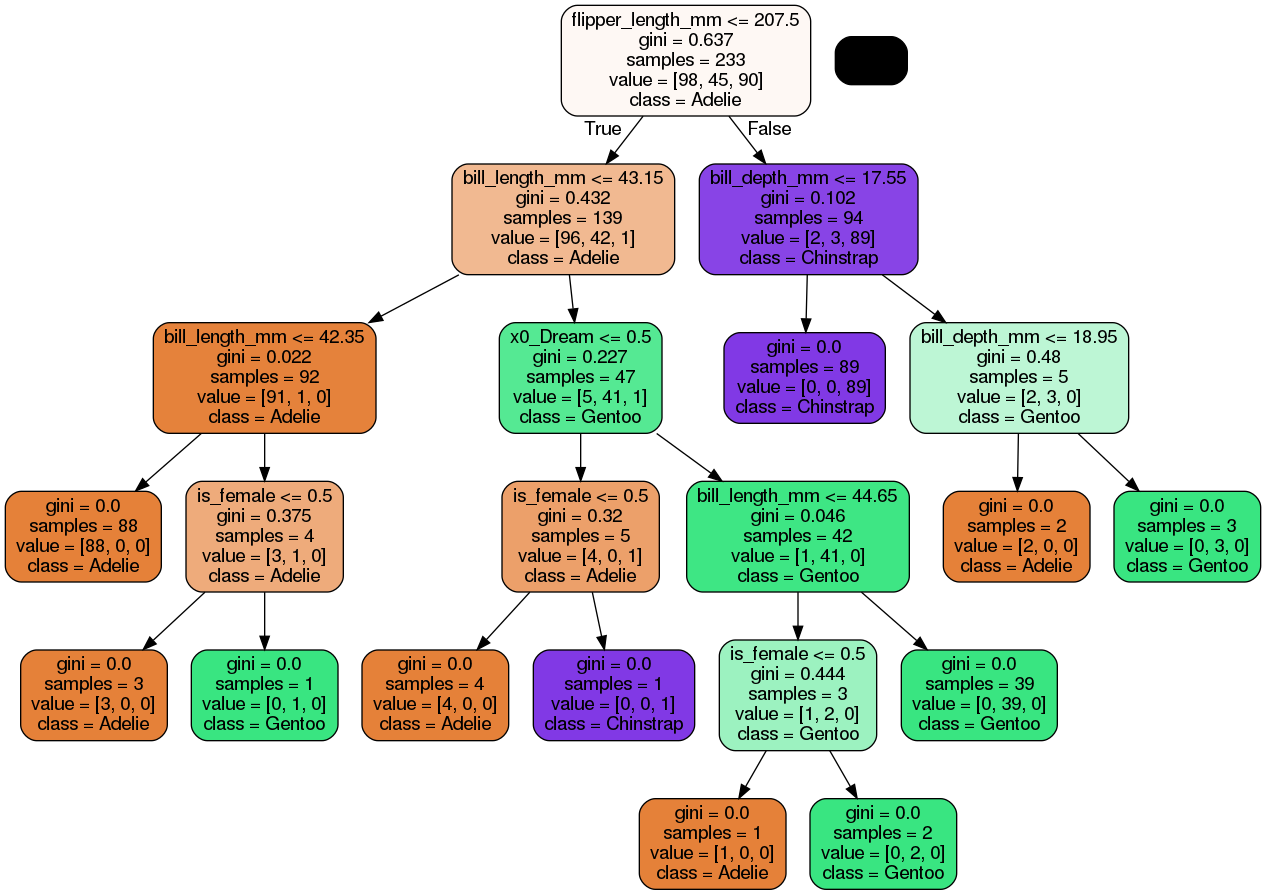

In [36]:
# Create DOT data
dot_data = export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=data.columns[1:].to_list(),
                            class_names=penguins['species'].unique().tolist(),
                            rounded=True,
                            filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  


Image(graph.create_png())